# $MSE(k,b)=\frac{1}{l}\sum^l_{i=1}(y_i-(kx_i+b))^2$
# $\frac{\delta MSE}{\delta k} = \frac{2}{l}\sum^l_{i=1}x_i(y_i-(kx_i+b))=0$
# $\frac{\delta MSE}{\delta b} = \frac{2}{l}\sum^l_{i=1}(y_i-(kx_i+b))=0$

$
\begin{equation}  
  
\begin{cases}  
\sum x_iy_i = k\sum x^2+b\sum x \\
\sum y_i = k \sum x^2 + bl
\end{cases}
 
\end{equation}
$

# $k = \frac{l\sum x_iy_i-\sum x_i \sum y_i}{l \sum x_i^2 - (\sum x_i)^2}$
# $b = \frac{y_i - k\sum x_i}{l}$


Оптимальные параметры: k = 0.7500, b = 1.3900
MSE: 0.0054
RMSE: 0.0735
R²: 0.9952


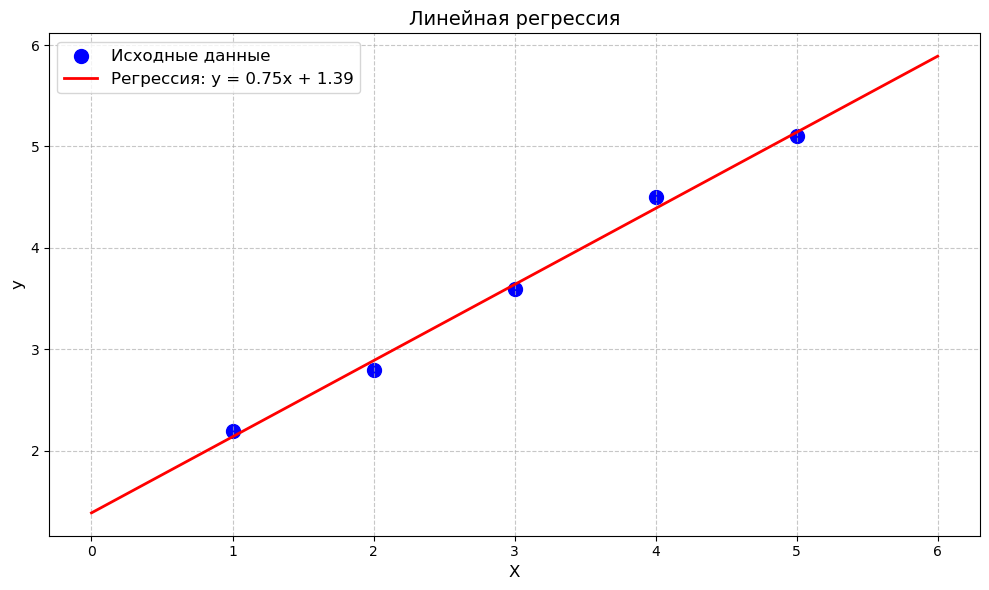

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from typing import Tuple, List

def fit_linear_model(X: List[float], y: List[float]) -> Tuple[float, float]:
    """
    Обучает линейную регрессию и возвращает коэффициенты k и b
    
    Параметры:
    X - список значений независимой переменной
    y - список значений зависимой переменной
    
    Возвращает:
    k - коэффициент наклона
    b - свободный член
    """
    # Проверка входных данных
    if len(X) != len(y):
        raise ValueError("X и y должны иметь одинаковую длину")
    if len(X) < 2:
        raise ValueError("Нужно как минимум 2 точки для построения регрессии")
    
    X = np.array(X).reshape(-1, 1)
    y = np.array(y)
    
    model = LinearRegression()
    model.fit(X, y)
    
    return model.coef_[0], model.intercept_

def calculate_metrics(y_true: List[float], y_pred: List[float]) -> dict:
    """
    Вычисляет метрики качества регрессии
    
    Параметры:
    y_true - истинные значения
    y_pred - предсказанные значения
    
    Возвращает:
    Словарь с метриками (MSE, RMSE, R²)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    if len(y_true) != len(y_pred):
        raise ValueError("y_true и y_pred должны иметь одинаковую длину")
    
    metrics = {
        'MSE': np.mean((y_true - y_pred) ** 2),
        'RMSE': np.sqrt(np.mean((y_true - y_pred) ** 2)),
        'R2': r2_score(y_true, y_pred)
    }
    return metrics

def plot_regression(X: List[float], y: List[float], k: float, b: float):
    """
    Визуализирует данные и линию регрессии
    
    Параметры:
    X - значения независимой переменной
    y - значения зависимой переменной
    k - коэффициент наклона
    b - свободный член
    """
    plt.figure(figsize=(10, 6))
    
    # Исходные данные
    plt.scatter(X, y, color='blue', label='Исходные данные', s=100)
    
    # Линия регрессии
    x_range = np.linspace(min(X)-1, max(X)+1, 100)
    plt.plot(x_range, k * x_range + b, 
             color='red', 
             linewidth=2, 
             label=f'Регрессия: y = {k:.2f}x + {b:.2f}')
    
    plt.xlabel('X', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title('Линейная регрессия', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

def main():
    # Пример данных
    X = [1, 2, 3, 4, 5]
    y = [2.2, 2.8, 3.6, 4.5, 5.1]
    
    try:
        # Обучение модели
        k, b = fit_linear_model(X, y)
        y_pred = [k * x + b for x in X]
        
        # Вычисление метрик
        metrics = calculate_metrics(y, y_pred)
        
        # Вывод результатов
        print(f"Оптимальные параметры: k = {k:.4f}, b = {b:.4f}")
        print(f"MSE: {metrics['MSE']:.4f}")
        print(f"RMSE: {metrics['RMSE']:.4f}")
        print(f"R²: {metrics['R2']:.4f}")
        
        # Визуализация
        plot_regression(X, y, k, b)
        
    except Exception as e:
        print(f"Ошибка: {e}")

if __name__ == "__main__":
    main()